In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import re
import matplotlib.pyplot as plt
attacks = pd.read_csv("input/attacks.csv",encoding='utf-8')
attacks.Activity.value_counts().head(10)
import src.helpers as helpers



## Get month, and season for Dataframe

In [2]:
attacks['Month']= attacks['Date'].map(helpers.get_month)
attacks['Season']= attacks['Month'].map(helpers.get_season)



## Parse shark type and add total area attacks

In [3]:

attacks['Shark type']= attacks.apply(helpers.fix_species_name, axis='columns')
attacks['Area Total']=attacks['Area'].groupby(attacks['Area']).transform('count')


## Attacks by activity

In [4]:
attacks.Activity.value_counts()


Surfing                                                                971
Swimming                                                               869
Fishing                                                                431
Spearfishing                                                           333
Bathing                                                                162
                                                                      ... 
U-177 torpedoed & sank the troopship Nova Scotia                         1
Washed overboard by swell                                                1
Fishing for sharks when he became entangled in net & fell overboard      1
Swimming underwater from crayfish cage to a fishing bait                 1
Fishing from 32' boat                                                    1
Name: Activity, Length: 1532, dtype: int64

## Parse activities and divide them by above surface (Kayak, surf ...) and below surface (swimming, diving ..)

In [5]:
attacks['activity_clean']= attacks['Activity'].map(helpers.clean_activity)
attacks.activity_clean.value_counts()


below_surface                                                                       2975
above_surface                                                                       1508
fishing                                                                              661
Sea disaster                                                                           8
Boating                                                                                7
                                                                                    ... 
Attempting to rescue drowning man                                                      1
Crossing inlet in a boat, seen fighting sharks with his oar, sharks smashed boat       1
yachtsman in a zodiac                                                                  1
Jumping in the waves                                                                   1
Thrashing the water / imitating the shark victim from "Jaws"                           1
Name: activity_clean,

## Which activities have higher death rate ?

In [6]:

by_activity = attacks.groupby(['Activity','Fatal (Y/N)']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
by_activity[by_activity['Fatal (Y/N)']=='Y'][:9]


,Activity,Fatal (Y/N),counts
1191,Swimming,Y,304
102,Bathing,Y,70
1153,Surfing,Y,49
419,Fishing,Y,47
1036,Spearfishing,Y,41
386,Fell overboard,Y,26
1193,Swimming,Y,21
273,Diving,Y,19
1106,Standing,Y,16


In [7]:

by_activity = attacks.groupby(['activity_clean','Fatal (Y/N)']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
by_activity[:5]


,activity_clean,Fatal (Y/N),counts
451,below_surface,N,1844
446,above_surface,N,1323
453,below_surface,Y,865
459,fishing,N,541
448,above_surface,Y,117


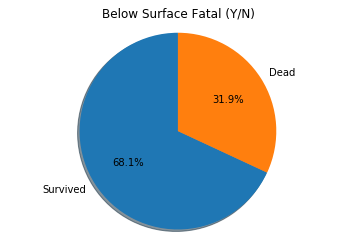

In [8]:
labels = 'Survived','Dead',

below_surface =by_activity[ by_activity['activity_clean']=='below_surface'][:2]['counts']

fig1, ax1 = plt.subplots()
ax1.pie(below_surface,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Below Surface Fatal (Y/N)")
plt.show()


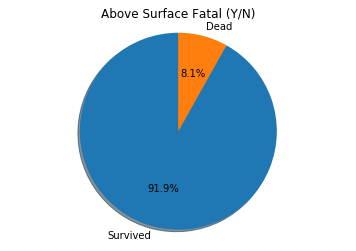

In [9]:
labels = 'Survived','Dead',

below_surface =by_activity[ by_activity['activity_clean']=='above_surface'][:2]['counts']

fig1, ax1 = plt.subplots()
ax1.pie(below_surface,  labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Above Surface Fatal (Y/N)")

plt.show()


In [10]:

usa_attacks = helpers.get_data_by_country(attacks,'USA')
by_activity = usa_attacks.groupby(['activity_clean','Fatal (Y/N)','Season']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)
by_activity

,activity_clean,Fatal (Y/N),Season,counts
119,below_surface,N,northern_summer,559
113,above_surface,N,northern_summer,465
114,above_surface,N,northern_winter,276
120,below_surface,N,northern_winter,156
124,fishing,N,northern_summer,119
...,...,...,...,...
39,Harassing a shark,N,northern_summer,1
38,Grabbed shark & threw it on deck,N,northern_summer,1
37,Gigging for flounder,UNKNOWN,northern_summer,1
36,Filming 5' blue shark,N,northern_summer,1


## Most common Shark Species By Area

In [12]:

by_shark_type= attacks.groupby(['Area','Area Total']).apply(helpers.count_species).reset_index().sort_values(by=["Area Total",'Shark type'],ascending=False)
by_shark_type.groupby(['Area']).apply(lambda df: df.loc[df['Shark type'].idxmax()] ).sort_values(by=["Area Total",'Shark type'],ascending=False)[:20]


,Area,Area Total,level_2,Shark type
Area,,,,
Florida,Florida,1037.0,nurse,35
New South Wales,New South Wales,486.0,white,33
Queensland,Queensland,311.0,tiger,17
Hawaii,Hawaii,298.0,tiger,79
California,California,290.0,white,100
KwaZulu-Natal,KwaZulu-Natal,213.0,white,19
Western Cape Province,Western Cape Province,195.0,white,76
Western Australia,Western Australia,189.0,white,29
Eastern Cape Province,Eastern Cape Province,160.0,raggedtooth,25
